(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x780da67b3850>,
  <matplotlib.collections.PatchCollection at 0x780da67b37f0>))

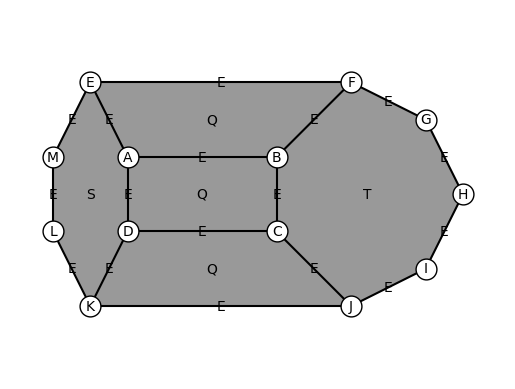

In [1]:
from hypergrammar.hypergraph import Hypergraph
from hypergrammar.edge import Edge, EdgeType

hg = Hypergraph()
hg.add_edge(Edge(EdgeType.E, frozenset({"A", "B"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"B", "C"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"C", "D"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"D", "A"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"A", "E"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"E", "F"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"B", "F"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"F", "G"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"G", "H"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"H", "I"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"I", "J"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"C", "J"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"J", "K"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"D", "K"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"K", "L"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"L", "M"})))
hg.add_edge(Edge(EdgeType.E, frozenset({"M", "E"})))
hg.add_edge(Edge(EdgeType.Q, frozenset({"A", "B", "E", "F"}), {"R": 0}))
hg.add_edge(Edge(EdgeType.Q, frozenset({"A", "B", "C", "D"}), {"R": 0}))
hg.add_edge(Edge(EdgeType.Q, frozenset({"K", "D", "C", "J"}), {"R": 0}))
hg.add_edge(Edge(EdgeType.S, frozenset({"E", "A", "D", "K", "L", "M"}), {"R": 0}))
hg.add_edge(Edge(EdgeType.T, frozenset({"F", "G", "H", "I", "J", "C", "B"}), {"R": 0}))

hg.set_vertex_parameter("A", {"x": 1, "y": 2})
hg.set_vertex_parameter("B", {"x": 3, "y": 2})
hg.set_vertex_parameter("C", {"x": 3, "y": 1})
hg.set_vertex_parameter("D", {"x": 1, "y": 1})
hg.set_vertex_parameter("E", {"x": 0.5, "y": 3})
hg.set_vertex_parameter("F", {"x": 4, "y": 3})
hg.set_vertex_parameter("G", {"x": 5, "y": 2.5})
hg.set_vertex_parameter("H", {"x": 5.5, "y": 1.5})
hg.set_vertex_parameter("I", {"x": 5, "y": 0.5})
hg.set_vertex_parameter("J", {"x": 4, "y": 0})
hg.set_vertex_parameter("K", {"x": 0.5, "y": 0})
hg.set_vertex_parameter("L", {"x": 0, "y": 1})
hg.set_vertex_parameter("M", {"x": 0, "y": 2})

hg.draw(use_positional_parameters=True)


Applied Prod0


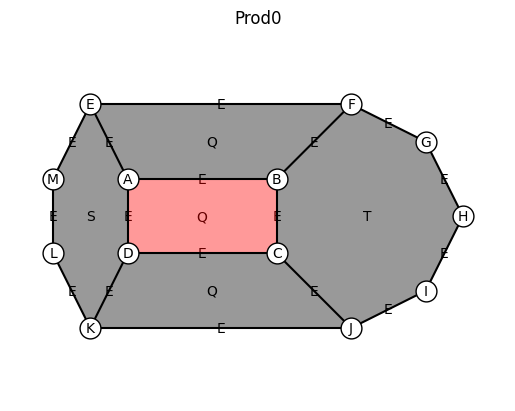

Applied Prod0


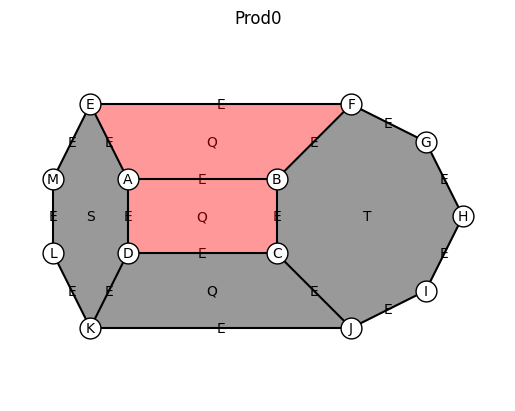

Applied Prod12


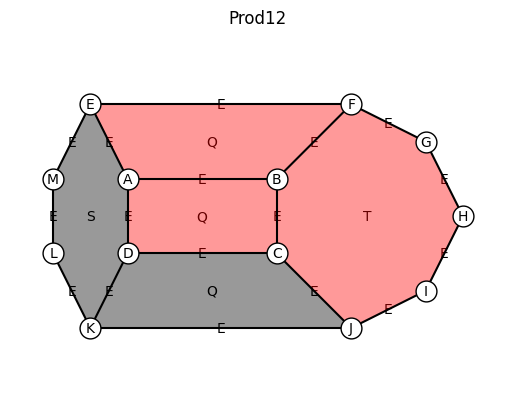

Applied Prod1


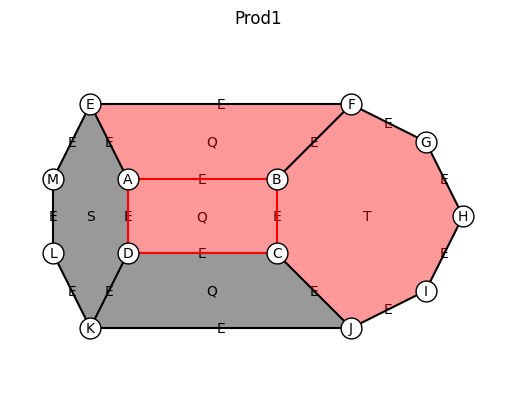

Applied Prod1


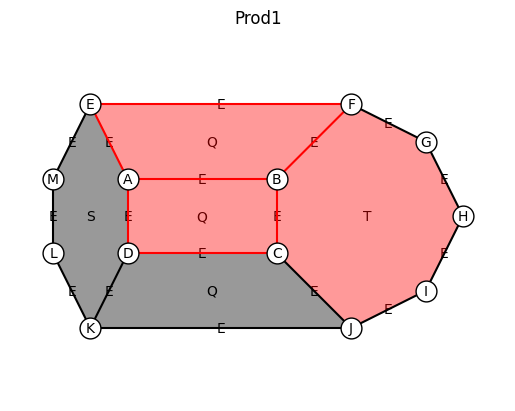

In [2]:
from hypergrammar.edge import Edge, EdgeType
import matplotlib.pyplot as plt
from hypergrammar.productions.prod_0 import Prod0
from hypergrammar.productions.prod_1 import Prod1
from hypergrammar.productions.prod_4 import Prod4
from hypergrammar.productions.prod_5 import Prod5
from hypergrammar.productions.prod_6 import Prod6
from hypergrammar.productions.prod_9 import Prod9
from hypergrammar.productions.prod_10 import Prod10
from hypergrammar.productions.prod_11 import Prod11
from hypergrammar.productions.prod_12 import Prod12
from hypergrammar.rfc import RFC

prod0 = Prod0()
prod1 = Prod1()
prod4 = Prod4()
prod5 = Prod5()
prod9 = Prod9()
prod10 = Prod10()
prod11 = Prod11()
prod12 = Prod12()

class VertexRFC(RFC):
    def __init__(self, vertex_name: str) -> None:
        self._vertex_name = vertex_name

    def is_valid(self, edge: Edge, hypergraph: Hypergraph, meta=None) -> bool:
        return self._vertex_name in edge.get_vertices()

def draw_step(hg, title: str) -> None:
    plt.figure()
    hg.draw(use_positional_parameters=True)
    plt.title(title)

    plt.show(block=False)
    plt.pause(0.01)
    plt.close()

def apply_prod_until_fixpoint(
    hg: Hypergraph,
    prod,
) -> Hypergraph:
    while True:
        new_hg = prod.apply(hg)
        if new_hg is None:
            break
        hg = new_hg
        print(f"Applied {prod.__class__.__name__}")
        draw_step(hg, title=prod.__class__.__name__)

    return hg

hg.set_rfc(VertexRFC("B"))

mark_productions = [
    Prod0(),
    Prod6(),
    Prod9(),
    Prod12(),
]

break_edge_productions = [
    Prod1(),
    Prod4(),
]

refine_productions = [
    Prod5(),
    Prod11(),
]

# 1st refinement level
# 1. Mark elements for refinement
for prod in mark_productions:
    hg = apply_prod_until_fixpoint(hg, prod)

# 2. Break edges
for prod in break_edge_productions:
    hg = apply_prod_until_fixpoint(hg, prod)

# 3. Split marked elements into subgraphs
for prod in refine_productions:
    hg = apply_prod_until_fixpoint(hg, prod)

# 2nd refinement level
# 4. Mark again (now we can mark smaller elements that still contain B)
for prod in mark_productions:
    hg = apply_prod_until_fixpoint(hg, prod)

# 5. Break edges again
for prod in break_edge_productions:
    hg = apply_prod_until_fixpoint(hg, prod)

# 6. Split again
for prod in refine_productions:
    hg = apply_prod_until_fixpoint(hg, prod)
